In [1]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
# ((訓練x, 訓練y), (測試x, 測試y))
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

In [4]:
print("訓練的維度:", x_train.shape)
print("測試的維度:", x_test.shape)

訓練的維度: (60000, 28, 28)
測試的維度: (10000, 28, 28)


標籤: 2


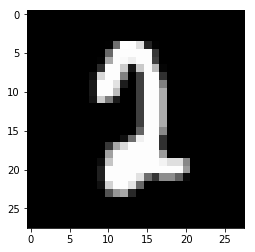

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("標籤:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [10]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,44,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,16,215,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,25,253,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# normalize: (0~1)(-1~1)
# 帶進去mlp前一定要攤平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# 目標: one-hot encoding
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 第一層一定要帶input_dim
model.add(Dense(input_dim=784, units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 二分:binary_crossentropy
# 多元:categorical_crossentropy
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# batch_size: 每看幾筆做一次梯度更新(100~200)
# epochs: 每一筆資料要看過幾次
# 總梯度更新次數: 資料筆數 * epochs / batch_size
# validation_split: train_test_split
# verbose: 輸出log的程度, 2
train_history = model.fit(x_train_shape, y_train_onehot, batch_size=200, 
                epochs=10, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.4235 - acc: 0.8845 - val_loss: 0.1858 - val_acc: 0.9513
Epoch 2/10
 - 1s - loss: 0.1993 - acc: 0.9431 - val_loss: 0.1361 - val_acc: 0.9657
Epoch 3/10
 - 1s - loss: 0.1474 - acc: 0.9590 - val_loss: 0.1125 - val_acc: 0.9688
Epoch 4/10
 - 1s - loss: 0.1171 - acc: 0.9663 - val_loss: 0.1006 - val_acc: 0.9730
Epoch 5/10
 - 1s - loss: 0.0959 - acc: 0.9724 - val_loss: 0.0885 - val_acc: 0.9747
Epoch 6/10
 - 1s - loss: 0.0804 - acc: 0.9770 - val_loss: 0.0857 - val_acc: 0.9762
Epoch 7/10
 - 1s - loss: 0.0685 - acc: 0.9801 - val_loss: 0.0807 - val_acc: 0.9757
Epoch 8/10
 - 1s - loss: 0.0600 - acc: 0.9831 - val_loss: 0.0793 - val_acc: 0.9772
Epoch 9/10
 - 1s - loss: 0.0513 - acc: 0.9859 - val_loss: 0.0823 - val_acc: 0.9762
Epoch 10/10
 - 1s - loss: 0.0451 - acc: 0.9878 - val_loss: 0.0744 - val_acc: 0.9782


In [20]:
model.evaluate(x_test_shape, y_test_onehot)

10000/10000 [==============================] - 0s 20us/step


[0.08038283917130902, 0.9749]

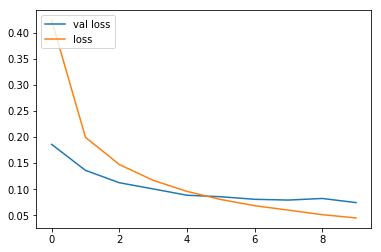

In [21]:
# 怎麼看幾次要停 - val_loss(藍線) -> 平緩 就可以停
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history.history["val_loss"])
plt.plot(train_history.history["loss"])
plt.legend(["val loss", "loss"], loc="upper left")

In [22]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(model.predict_classes(x_test_shape), y_test))

,0,1,2,3,4,5,6,7,8,9
0,970,0,6,0,1,2,7,0,4,2
1,0,1123,3,0,0,0,2,2,1,4
2,1,2,988,0,2,0,1,8,2,0
3,2,2,9,990,1,10,2,5,13,7
4,0,0,3,0,955,1,3,0,4,5
5,2,1,0,3,0,868,4,0,5,3
6,2,2,2,0,6,5,937,0,2,1
7,1,1,10,7,4,0,0,1005,5,6
8,1,4,11,5,1,3,2,2,933,1
9,1,0,0,5,12,3,0,6,5,980
